In [28]:
## ProductionTank 2502 - 4 Tonne Capacity 

## Importing all the necessary libraries

In [29]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns

### Upload CSV File 

In [30]:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\ProductionDataupdated1.csv'
ProductionTank = pd.read_csv(file_path)

In [31]:
ProductionTank

,Unnamed: 0,Material,BATCHID,Tank_1,Instruction_Step,INGRED_ID,INGRED_Name,Quantity,Phase_start,Phase_end,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration Phase
0,0,1002150,107643491,2503,S3_BATCH_IN_PROGRESS,NaN,NaN,0.000,09/03/2022 10:42,09/03/2022 10:42,0,0,1,0.0000,NaN,0,NaN,0
1,1,1002150,107643491,2503,STEP1_CONS,1002565,WATER TREATED,5760.000,09/03/2022 10:42,09/03/2022 11:16,34,0,2,169.4118,733.5050,8,26.0,0
2,2,1002150,107643491,2503,PLEASE VERIFY BULK ADDITION,NaN,NaN,0.000,09/03/2022 11:16,09/03/2022 11:17,1,0,3,0.0000,NaN,3,0.0,0
3,3,1002150,107643491,2503,STEP1_CONS,1037802,S813 SOD BENZOATE XFX25,5.629,09/03/2022 11:17,09/03/2022 11:27,10,0,4,0.5629,6.3182,1,9.0,0
4,4,1002150,107643491,2503,STEP1_CONS,1002818,S651 CITRIC ACID ANH BG XFX25,78.766,09/03/2022 11:27,09/03/2022 11:38,11,0,5,7.1605,6.3182,12,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,9482,3055706,107737576,2502,TAKE A SAMPLE AND SUBMIT FOR QA.,NaN,NaN,0.000,08/05/2022 11:43,08/05/2022 11:54,11,0,19,0.0000,NaN,10,1.0,0
9483,9483,3055706,107737576,2502,SAMPLE TO LAB. RESULTS OK? (NO TO HOMOGENISE),NaN,NaN,0.000,08/05/2022 11:54,08/05/2022 11:55,1,0,20,0.0000,NaN,10,0.0,0
9484,9484,3055706,107737576,2502,STEP8_AGITATION,NaN,NaN,0.000,08/05/2022 11:56,08/05/2022 11:56,0,1,21,0.0000,NaN,0,0.0,0
9485,9485,3055706,107737576,2502,S4_BATCH_COMPLETE_QA_PENDING,NaN,NaN,0.000,08/05/2022 11:56,08/05/2022 11:56,0,0,22,0.0000,NaN,0,NaN,0


In [32]:
ProductionTank.drop(columns=['Unnamed: 0'], inplace=True)

### Filter the ProductionTank df to show only 2502 production results

In [33]:
ProductionTank2502_df= ProductionTank.query('Tank_1 == "%s"' % 2502)
print(ProductionTank2502_df) 

      Material    BATCHID Tank_1  \
251    1006884  107926373   2502   
252    1006884  107926373   2502   
253    1006884  107926373   2502   
254    1006884  107926373   2502   
255    1006884  107926373   2502   
...        ...        ...    ...   
9482   3055706  107737576   2502   
9483   3055706  107737576   2502   
9484   3055706  107737576   2502   
9485   3055706  107737576   2502   
9486   3055706  107737576   2502   

                                   Instruction_Step INGRED_ID INGRED_Name  \
251                         SELECT_DESTINATION_TANK       NaN         NaN   
252                    S4_BATCH_COMPLETE_QA_PENDING       NaN         NaN   
253                TAKE A SAMPLE AND SUBMIT FOR QA.       NaN         NaN   
254   SAMPLE TO LAB. RESULTS OK? (NO TO HOMOGENISE)       NaN         NaN   
255                                              HP       NaN         NaN   
...                                             ...       ...         ...   
9482               TAKE A SA

### Filter the ProductionTank2502_df by Material and Material_Name columns

NB: Looking at ingredients ( Material_Name ) addition in the material production in this tank 2502

In [34]:
# Group by the 'Material','Material_Name' column
#grouped = ProductionTank2502_df.groupby(['Material'])

#grouped.head()
# Apply aggregation functions to the grouped data
#mean_values = grouped.mean()
#sum_values = grouped['Quantity'].sum()
#count_values = grouped['Phase_duration'].count()

#print("Mean Values:")
#print(mean_values)

#print("\nSum Values:")
#print(sum_values)

#print("\nCount Values:")
#print(count_values)

### Aggregation of data per tank : by Material

In [35]:
#Aggregate data per tank
aggregated_ProductionTank2502_df = ProductionTank2502_df.groupby(['Material']).agg({
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'sum',
    
    'Target_Flowrate':'sum'
}).reset_index()

 #Print the aggregated DataFrame
#print(aggregated_ProductionTank2502_df)

### Aggregation of data per tank : by BATCHID

In [36]:
#Aggregate data per tank
aggregated_ProductionTank2502_df1 = ProductionTank2502_df.groupby(['BATCHID','Material']).agg({
    'Phase_duration': 'sum',
    'Phase_overrun': 'mean',
    'Phase_start_delay':'mean',
    #'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()

 #Print the aggregated DataFrame
print(aggregated_ProductionTank2502_df1)

      BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0   107548283   1880112             219      20.000000           1.000000   
1   107573888   1779699             963      46.533333          30.894737   
2   107599589   1648718             281      39.666667           9.500000   
3   107619398   1880112             249      24.666667           0.400000   
4   107630217   1667507             971      30.133333          19.894737   
5   107643502   1779699             366       6.200000          19.157895   
6   107654587   1756358             220      17.000000           0.600000   
7   107673347   1756358             419      10.533333          11.894737   
8   107673776   1648718             690      19.954545           9.461538   
9   107673784   1397022             301      43.000000           0.800000   
10  107692170   1486042             199      18.333333           0.600000   
11  107700722   1875468             567      17.166667         191.818182   

### Data Visualisation 

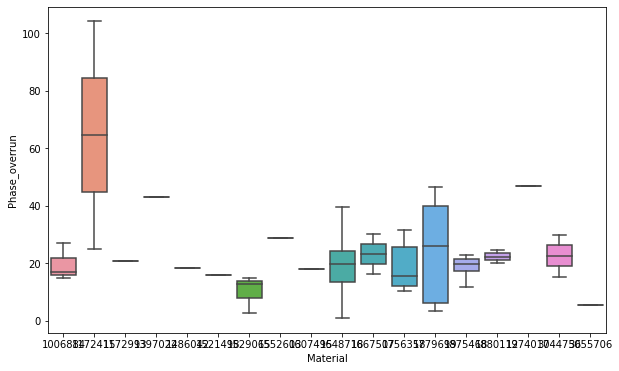

In [37]:
# Box plot to visualize the distribution of Phase_overrun across different Materials
plt.figure(figsize=(10, 6))
sns.boxplot(data=aggregated_ProductionTank2502_df1, x='Material', y='Phase_overrun')
plt.show()

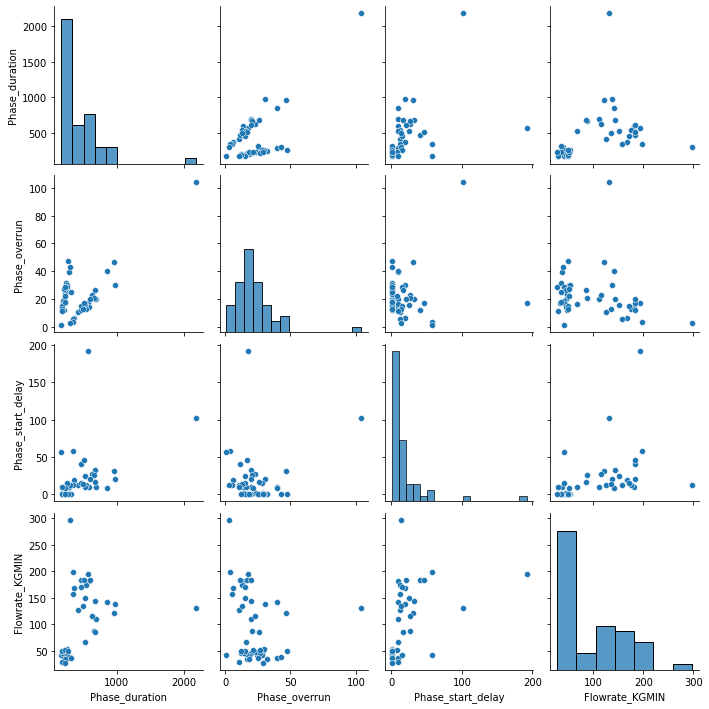

In [38]:
# Pair plot to visualize relationships between numeric variables
numeric_columns = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay','Flowrate_KGMIN']
sns.pairplot(aggregated_ProductionTank2502_df1[numeric_columns])
plt.show()

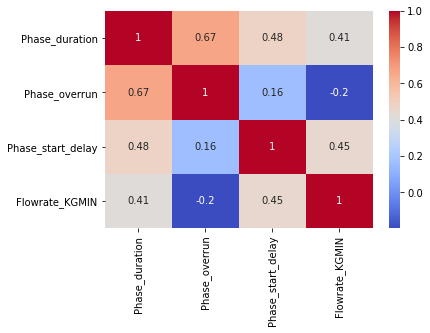

In [39]:
# Correlation heatmap to visualize correlation between numeric variables
correlation_matrix = aggregated_ProductionTank2502_df1[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [40]:
#aggregated_ProductionTank2502_df1.info

In [41]:
# Handling missing values
aggregated_ProductionTank2502_df1.dropna(inplace=True)  # Remove rows with missing values

In [42]:
# Handling duplicates
aggregated_ProductionTank2502_df1.drop_duplicates(inplace=True)  # Remove duplicate rows

In [43]:
print(aggregated_ProductionTank2502_df1.head())

     BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0  107548283   1880112             219      20.000000           1.000000   
1  107573888   1779699             963      46.533333          30.894737   
2  107599589   1648718             281      39.666667           9.500000   
3  107619398   1880112             249      24.666667           0.400000   
4  107630217   1667507             971      30.133333          19.894737   

   Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  
0         46.2629              33.400000        52.028700  
1        121.4530              15.526316        58.706286  
2         36.7893              40.500000        28.128400  
3         41.8916              36.800000        52.028700  
4        137.4782              16.789474        62.172957  


In [44]:
# Define columns where you want to detect and remove outliers
ProductionTank2502_df = pd.DataFrame(aggregated_ProductionTank2502_df1)
columns_to_check = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN', 'Target_Phase_duration', 'Target_Flowrate']

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column, iqr_multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each column
for col in columns_to_check:
    ProductionTank2502_df = remove_outliers_iqr(ProductionTank2502_df, col)

# Display the cleaned DataFrame
print(ProductionTank2502_df)

      BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0   107548283   1880112             219      20.000000           1.000000   
3   107619398   1880112             249      24.666667           0.400000   
4   107630217   1667507             971      30.133333          19.894737   
5   107643502   1779699             366       6.200000          19.157895   
6   107654587   1756358             220      17.000000           0.600000   
8   107673776   1648718             690      19.954545           9.461538   
9   107673784   1397022             301      43.000000           0.800000   
10  107692170   1486042             199      18.333333           0.600000   
12  107711607   1648718             590      13.909091           9.615385   
13  107721584   1756358             240      29.000000           1.200000   
14  107737576   3055706             341       5.631579          12.782609   
16  107781849   1756358             233      23.666667           1.200000   

In [45]:
# For the original DataFrame
print("Original DataFrame Summary Statistics:")
print(aggregated_ProductionTank2502_df1.describe())

# After removing outliers
print("\nCleaned DataFrame Summary Statistics:")
print(ProductionTank2502_df.describe())

Original DataFrame Summary Statistics:
            BATCHID      Material  Phase_duration  Phase_overrun  \
count  4.900000e+01  4.900000e+01       49.000000      49.000000   
mean   1.078403e+08  1.720107e+06      429.530612      22.263204   
std    1.503463e+05  4.177283e+05      332.551130      16.021098   
min    1.075483e+08  1.006884e+06      169.000000       1.000000   
25%    1.077116e+08  1.552603e+06      226.000000      13.909091   
50%    1.078374e+08  1.756358e+06      301.000000      19.611111   
75%    1.079499e+08  1.779699e+06      536.000000      27.000000   
max    1.080848e+08  3.055706e+06     2180.000000     104.111111   

       Phase_start_delay  Flowrate_KGMIN  Target_Phase_duration  \
count          49.000000       49.000000              49.000000   
mean           18.012598       96.323851              24.614085   
std            31.911785       64.383661              11.753227   
min             0.400000       27.551500              10.884615   
25%          

In [46]:
# Scaling numerical variables (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN']
ProductionTank2502_df[numerical_cols] = scaler.fit_transform(ProductionTank2502_df[numerical_cols])
print(ProductionTank2502_df.head())

     BATCHID  Material  Phase_duration  Phase_overrun  Phase_start_delay  \
0  107548283   1880112       -0.762706       0.007080          -0.742050   
3  107619398   1880112       -0.613589       0.609716          -0.799818   
4  107630217   1667507        2.975162       1.315661           1.077150   
5  107643502   1779699       -0.032033      -1.775000           1.006206   
6  107654587   1756358       -0.757736      -0.380328          -0.780562   

   Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  
0       -0.688066              33.400000        52.028700  
3       -0.768880              36.800000        52.028700  
4        0.998277              16.789474        62.172957  
5        1.561295              15.684211        58.706286  
6       -0.914900              33.800000        42.756800  


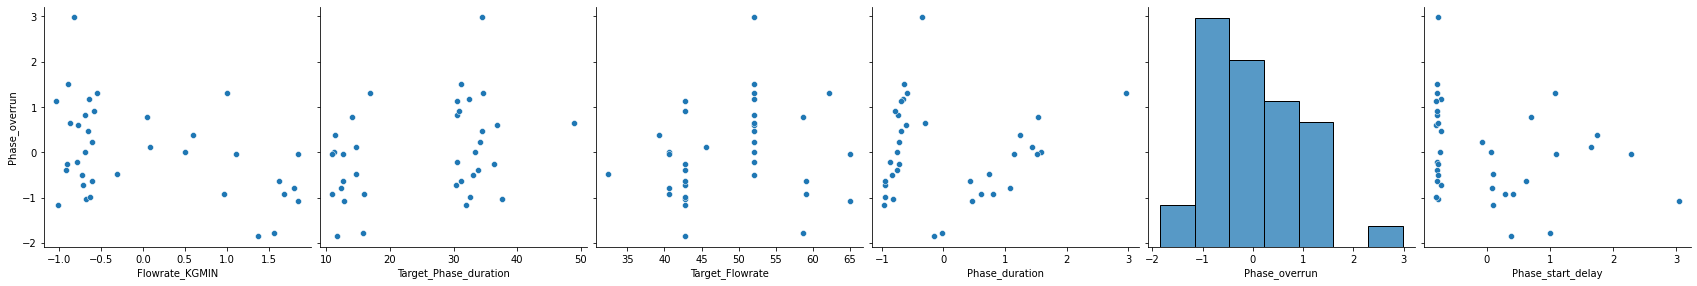

In [47]:
#Step 3: Visualization
#Let us plot the scatter plot for target variable vs. predictor variables in a single plot to get the intuition. Also, plotting a heatmap for all the variables,

#Importing seaborn library for visualizations
import seaborn as sns
#to plot all the scatterplots in a single plot
sns.pairplot(ProductionTank2502_df, x_vars=['Flowrate_KGMIN','Target_Phase_duration','Target_Flowrate','Phase_duration','Phase_overrun','Phase_start_delay'], y_vars = 'Phase_overrun', size = 4, kind = 'scatter' )
plt.show()

### Applying Machine Learning Algorithms 

In [48]:
#pip install lightgbm

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from tabulate import tabulate
# Load your dataset (replace 'ProductionTank2502_df' with your actual dataset)
df = pd.DataFrame(ProductionTank2502_df)

# Define features and target
X = df.drop(['Phase_overrun'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred_train = ridge_model.predict(X_train)
ridge_pred_test = ridge_model.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred_train = lasso_model.predict(X_train)
lasso_pred_test = lasso_model.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)

# RandomForest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred_train = gb_model.predict(X_train)
gb_pred_test = gb_model.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)


# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred_train = dt_model.predict(X_train)
dt_pred_test = dt_model.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)

# Bagging Regressor (based on Decision Trees by default)
bag_model = BaggingRegressor(n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)
bag_pred_train = bag_model.predict(X_train)
bag_pred_test = bag_model.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)

# AdaBoost Regressor
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred_train = ada_model.predict(X_train)
ada_pred_test = ada_model.predict(X_test)
ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)



# Print the results DataFrame
#print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('2502results.xlsx', index=False)


+----+-----------------------------+-------------+------------+------------+-----------+
|    | Model                       |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+=============================+=============+============+============+===========+
|  0 | Linear Regression           | 0.511061    |   0.462484 |   0.572121 | -0.711787 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  1 | Ridge Regression            | 0.51618     |   0.427793 |   0.567835 | -0.583387 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  2 | Lasso Regression            | 0.961262    |   0.335918 |   0.195197 | -0.243329 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  3 | Random Forest Regressor     | 0.132263    |   0.463438 |   0.889264 | -0.715318 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  4 | Gradient Boost

In [50]:
# Create a list of models with their respective hyperparameters
# Initialize models
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(),
    DecisionTreeRegressor(random_state=42)
]

# Perform cross-validation for each model
for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores  # Convert negative MSE back to positive
    mean_mse = mse_scores.mean()
    std_mse = mse_scores.std()
    print(f"{model_name}:\n  Mean MSE: {mean_mse:.6f}\n  Std MSE: {std_mse:.6f}\n")

LinearRegression:
  Mean MSE: 0.785942
  Std MSE: 0.260336

Ridge:
  Mean MSE: 0.723158
  Std MSE: 0.309405

Lasso:
  Mean MSE: 1.083127
  Std MSE: 0.517576

RandomForestRegressor:
  Mean MSE: 0.676099
  Std MSE: 0.402540

GradientBoostingRegressor:
  Mean MSE: 0.643081
  Std MSE: 0.406442

SVR:
  Mean MSE: 1.025874
  Std MSE: 0.464868

MLPRegressor:
  Mean MSE: 6788347461899.284180
  Std MSE: 5775681751386.767578

DecisionTreeRegressor:
  Mean MSE: 1.368442
  Std MSE: 1.064713



In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (replace 'ProductionTank2502_df' with your actual dataset)
df = pd.DataFrame(ProductionTank2502_df)

# Define features and target
X = df.drop(['Phase_overrun'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression with Hyperparameter Tuning
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
ridge_pred_train = best_ridge.predict(X_train)
ridge_pred_test = best_ridge.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)

# Lasso Regression with Hyperparameter Tuning
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
lasso_pred_train = best_lasso.predict(X_train)
lasso_pred_test = best_lasso.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)

# Random Forest Regressor with Hyperparameter Tuning
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_pred_train = best_rf.predict(X_train)
rf_pred_test = best_rf.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
rf_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)

# Gradient Boosting Regressor with Hyperparameter Tuning
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
gb_grid = GridSearchCV(GradientBoostingRegressor(), gb_params, cv=5)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
gb_pred_train = best_gb.predict(X_train)
gb_pred_test = best_gb.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
gb_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)

# Decision Tree Regressor with Hyperparameter Tuning
dt_params = {'max_depth': [None, 10, 20]}
dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
dt_pred_train = best_dt.predict(X_train)
dt_pred_test = best_dt.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)

# Bagging Regressor with Hyperparameter Tuning
bag_params = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

bag_grid = GridSearchCV(BaggingRegressor(random_state=42), bag_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
bag_grid.fit(X_train, y_train)
bag_best = bag_grid.best_estimator_

# Using the best estimator from GridSearch to make predictions
bag_pred_train = bag_best.predict(X_train)
bag_pred_test = bag_best.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)


# AdaBoost Regressor with Hyperparameter Tuning
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1]
}
ada_grid = GridSearchCV(AdaBoostRegressor(random_state=42), ada_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ada_model.fit(X_train, y_train)
ada_pred_train = ada_model.predict(X_train)
ada_pred_test = ada_model.predict(X_test)
ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)




# Print the results DataFrame
#print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('2502 TUN results.xlsx', index=False)

+----+-----------------------------+-------------+------------+------------+-----------+
|    | Model                       |   Train MSE |   Test MSE |   Train R2 |   Test R2 |
+====+=============================+=============+============+============+===========+
|  0 | Linear Regression           |    0.511061 |   0.462484 |   0.572121 | -0.711787 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  1 | Ridge Regression            |    0.51618  |   0.427793 |   0.567835 | -0.583387 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  2 | Lasso Regression            |    0.51228  |   0.433835 |   0.5711   | -0.605748 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  3 | Random Forest Regressor     |    0.116207 |   0.52366  |   0.902707 | -0.938218 |
+----+-----------------------------+-------------+------------+------------+-----------+
|  4 | Gradient Boost